In [66]:
#importando o dataset para o ambiente colab
import pandas as pd

df = pd.read_csv('/content/sample_data/netflix_titles.csv')

display(df.head())
display(df.shape)
display(df.info())
display(df.describe())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


(8807, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


None

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


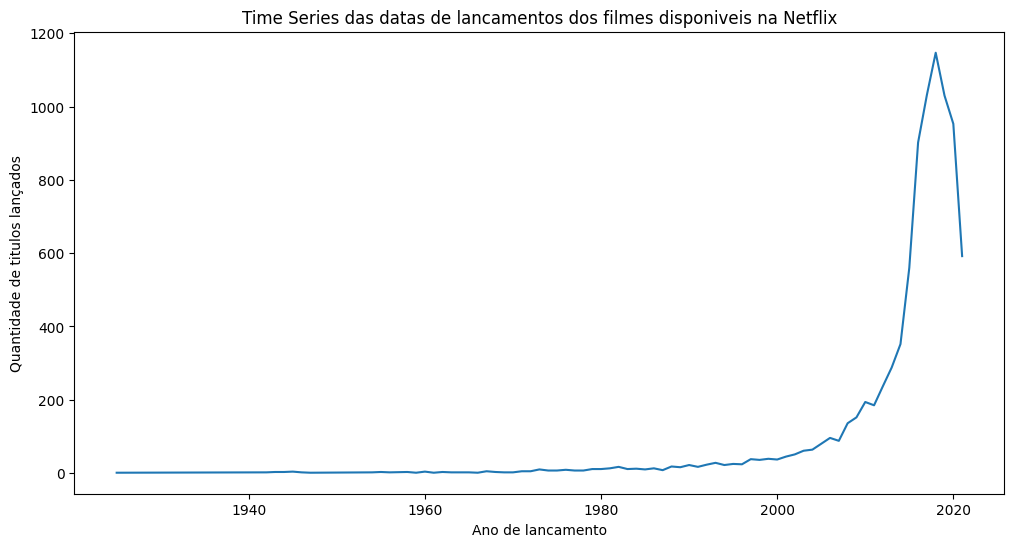

In [68]:
#  criar uma serie temporal das datas de lançamentos da netflix

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/sample_data/netflix_titles.csv')

# Create a time series
df_ts = df.groupby('release_year')['show_id'].count()

# Plot the time series
df_ts.plot( figsize=(12, 6))
plt.title('Time Series das datas de lancamentos dos filmes disponiveis na Netflix')
plt.xlabel('Ano de lancamento')
plt.ylabel('Quantidade de titulos lançados')
plt.show()


In [62]:
#pivot table para avaliar os ratings dos filmes
# Load the dataset
df = pd.read_csv('/content/sample_data/netflix_titles.csv')

rating_movie = df[df['rating'].str.contains('min')== False]
#print(rating_movie)

df_pivot = pd.pivot_table(rating_movie, index='rating', values='show_id', aggfunc='count')
print(df_pivot)

          show_id
rating           
G              41
NC-17           3
NR             80
PG            287
PG-13         490
R             799
TV-14        2160
TV-G          220
TV-MA        3207
TV-PG         863
TV-Y          307
TV-Y7         334
TV-Y7-FV        6
UR              3


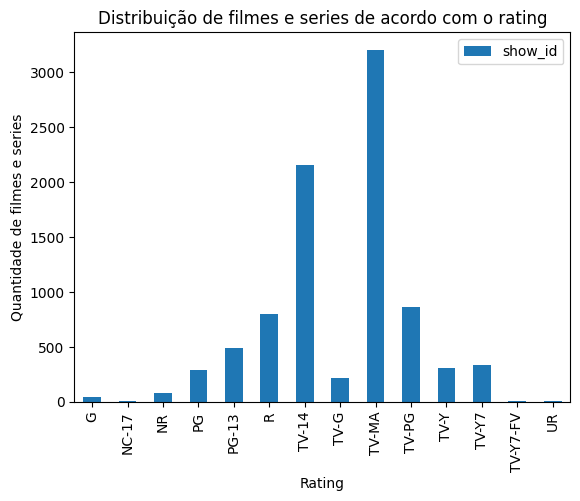

In [65]:
# criar grafico de distribuicao de df_pivot

import matplotlib.pyplot as plt

df_pivot.plot(kind='bar')
plt.title('Distribuição de filmes e series de acordo com o rating')
plt.xlabel('Rating')
plt.ylabel('Quantidade de filmes e series')
plt.show()

Rating dos paises

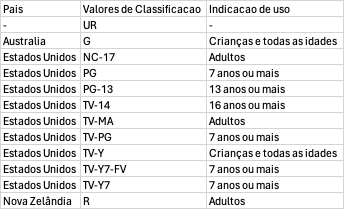




         show_id
type            
Movie       6126
TV Show     2674
         show_id
type            
Movie       6126
TV Show     2674


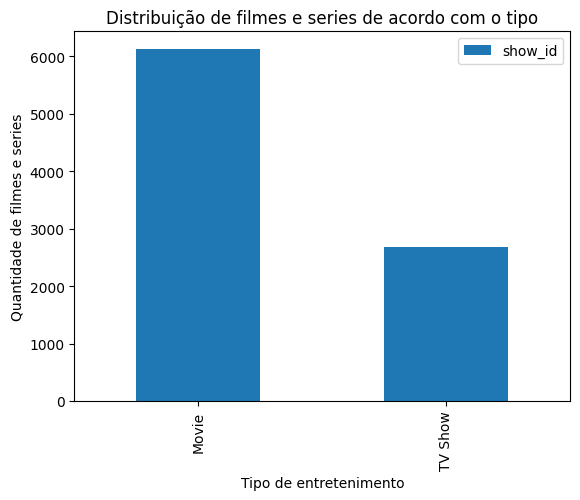

In [74]:
# tabela com as distribuicao por tipo

df_type = pd.pivot_table(rating_movie, index='type', values='show_id', aggfunc='count')
print(df_type)

import matplotlib.pyplot as plt

df_type.plot(kind='bar')
plt.title('Distribuição de filmes e series de acordo com o tipo')
plt.xlabel('Tipo de entretenimento')
plt.ylabel('Quantidade de filmes e series')
plt.show()

                                                    show_id
country                                                    
, France, Algeria                                         1
, South Korea                                             1
Argentina                                                56
Argentina, Brazil, France, Poland, Germany, Den...        1
Argentina, Chile                                          2
...                                                     ...
Venezuela                                                 1
Venezuela, Colombia                                       1
Vietnam                                                   7
West Germany                                              1
Zimbabwe                                                  1

[748 rows x 1 columns]
                show_id
country                
United States      2815
India               972
United Kingdom      419
Japan               244
South Korea         199
Canada              181
Spai

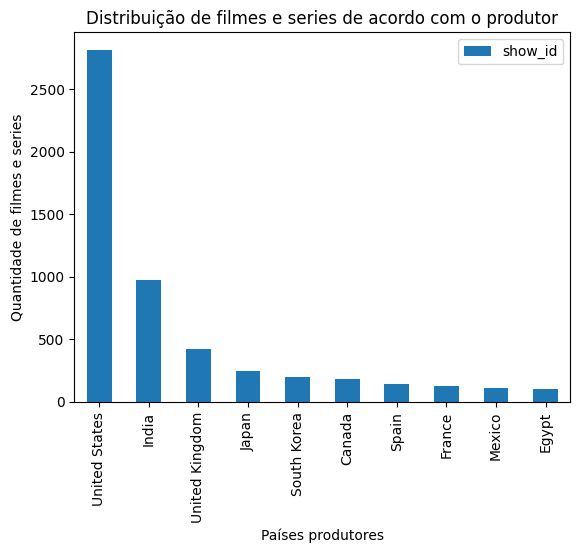

In [75]:
# tabela com as distribuicao por tipo
import matplotlib.pyplot as plt

df_type = pd.pivot_table(rating_movie, index='country', values='show_id', aggfunc='count')
print(df_type)

df_maiores_produtores = df_type.nlargest(10, 'show_id')
print(df_maiores_produtores)

df_maiores_produtores.plot(kind='bar')
plt.title('Distribuição de filmes e series de acordo com o produtor')
plt.xlabel('Países produtores')
plt.ylabel('Quantidade de filmes e series')

plt.show()